## TASK-01: Regression Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Read & analyse trasnsistor data.

In [95]:
trans_data=pd.read_csv('transistor_data.csv')
trans_data.head()

,Processor,MOS transistor count,Date of Introduction,Designer,MOSprocess,Area
0,Intel 4004 (4-bit 16-pin),2250,1971,Intel,"10,000 nm",12 mm²
1,Intel 8008 (8-bit 18-pin),3500,1972,Intel,"10,000 nm",14 mm²
2,NEC μCOM-4 (4-bit 42-pin),2500,1973,NEC,"7,500 nm",?
3,Intel 4040 (4-bit 16-pin),3000,1974,Intel,"10,000 nm",12 mm²
4,Motorola 6800 (8-bit 40-pin),4100,1974,Motorola,"6,000 nm",16 mm²


In [96]:
trans_data.dtypes

Processor               object
MOS transistor count     int64
Date of Introduction     int64
Designer                object
MOSprocess              object
Area                    object
dtype: object

## 1.2 Plot of data

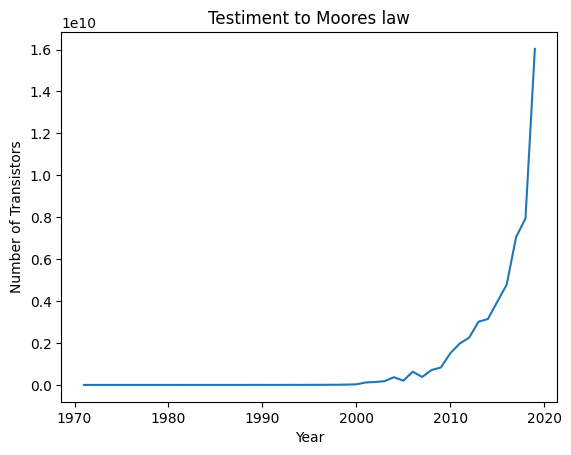

In [97]:
yearly_averages = {}
for year, value in zip(trans_data['Date of Introduction'], trans_data['MOS transistor count']):
  if year not in yearly_averages:
    yearly_averages[year] = []
  yearly_averages[year].append(value)

years = list(yearly_averages.keys())
average_values = [np.mean(values) for values in yearly_averages.values()]

plt.plot(years,average_values)

plt.xlabel('Year')
plt.ylabel('Number of Transistors')
plt.title('Testiment to Moores law')

plt.show()

## 1.3 Analytical solution

### Calculation of log values.

In [129]:
import math
m = math.log(2) / 2
print("m = " + str(m))
t = math.log(2250) - 1971 * m
print("t = " + str(t))

m = 0.34657359027997264
t = -675.3778609466276


In [130]:
def exponential(x, m, t):
    exponent = m * x + t
    return np.exp(exponent)

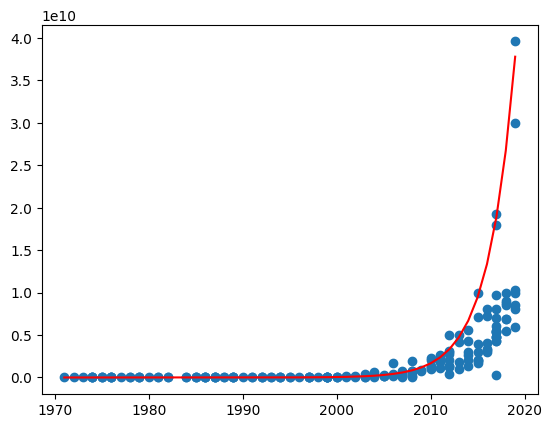

In [131]:
data = np.loadtxt("transistor_data.csv", delimiter=",", usecols=[1, 2], skiprows=1)
transistor_prediction = exponential(data[:,1], m, t)
plt.figure()
plt.scatter(data[:,1], data[:,0])
plt.plot(data[:,1], transistor_prediction, 'r');

### Fit model, predit model.

In [133]:
year=data[:,1]
transistor_count=data[:,0]
x = year.reshape(-1, 1)
y = np.log(transistor_count)
print(x.shape)
print(y.shape)
model.fit(x,y)
y_pred = model.predict(x)
print("Fitted m: " + str(model.coef_[0]))
print("Fitted t: " + str(model.intercept_))

(179, 1)
(179,)
Fitted m: 0.34163208255916167
Fitted t: -666.3264063536228


### Print the model outcomes.

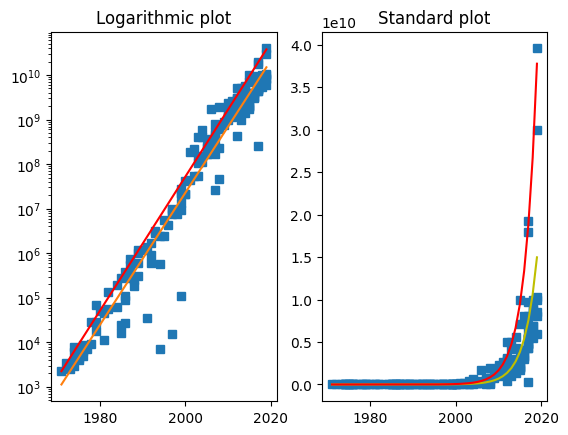

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure()
fig.add_subplot(1,2,1)
plt.semilogy(year, transistor_count, "s", label="MOS transistor count")
plt.plot(x, np.exp(y_pred))
plt.plot(data[:,1], transistor_prediction, 'r')
plt.title("Logarithmic plot")

fig.add_subplot(1,2,2)
plt.plot(year, transistor_count, "s", label="MOS transistor count")
plt.plot(x, np.exp(y_pred), 'y')
plt.plot(data[:,1], transistor_prediction, 'r')
plt.title("Standard plot")

plt.show()

## 1.4 Numerical solution

### Create X and y data-frames for model training.

In [71]:
X=pd.DataFrame(trans_data['Date of Introduction'])
y=pd.DataFrame(trans_data['MOS transistor count'])
y = y.map(np.log2)

### Split the data into train and test sets.

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

### Create a linear regression model, fit the model, get accuracy and get predictions. 

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [74]:
model=lr.fit(X_train,y_train)

In [80]:
print("The accuracy of linear regression model for Moore's law is: ",model.score(X_test,y_test))

The accuracy of linear regression model for Moore's law is:  0.9200253977970592


In [76]:
predictions=model.predict(X)

#### Plot of actual data and actual data.

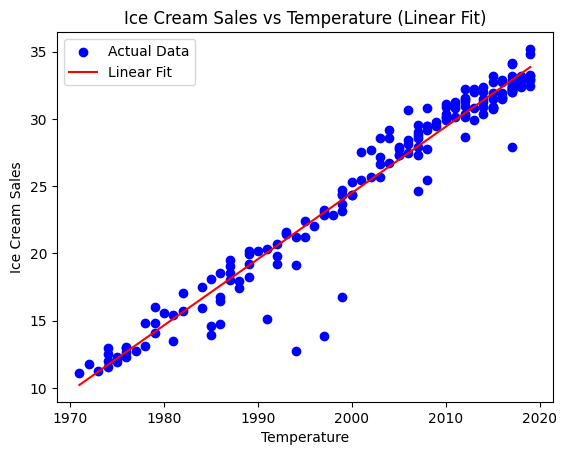

In [77]:
plt.scatter(X, y, color='blue', label='Actual Data') 
plt.plot(X, predictions, color='red', label='Linear Fit') 
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.title('Ice Cream Sales vs Temperature (Linear Fit)')
plt.legend()
plt.show()

## TASK-02: Polynomial (Linear) Regression.

### Read and analyse data

In [81]:
data_ice=pd.read_csv('Ice_cream_selling_data.csv')
data_ice.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


### Load the models.

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### Model creation without using polynomial features.

#### Create the data frames X and y. Split them. 

In [59]:
X=pd.DataFrame(data_ice['Temperature (°C)'])
y=pd.DataFrame(data_ice['Ice Cream Sales (units)'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

#### Create the linear regression model, fit the model, score the model and predict values.

In [61]:
lr_ice=LinearRegression()

model_ice=lr_ice.fit(X_train,y_train)
print(model_ice.score(X_test,y_test))

y_preds_lin=model_ice.predict(X)

0.046781371261324645


#### Plot of actual data and the model.

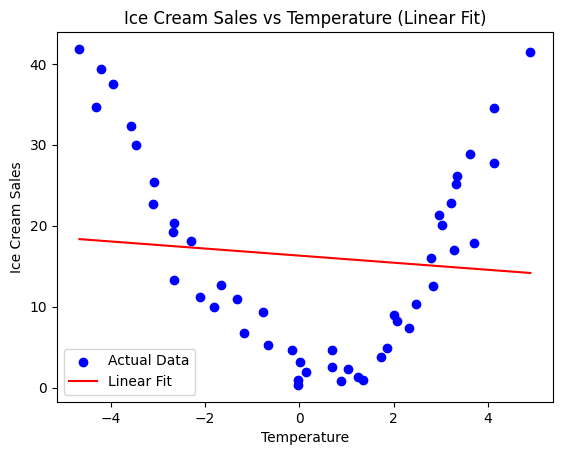

In [65]:
plt.scatter(X, y, color='blue', label='Actual Data') 
plt.plot(X, y_preds_lin, color='red', label='Linear Fit') 
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.title('Ice Cream Sales vs Temperature (Linear Fit)')
plt.legend()
plt.show()

### Linear regression using the polynomial features

#### Create polynomial features and split the data.

In [83]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.25)


#### Train, score and predict using linear regression model.

In [ ]:
model_ice_2=lr_ice.fit(X_train,y_train)
print(model_ice_2.score(X_test,y_test))

y_preds_polynomial=model_ice_2.predict(X_poly)

#### Plot the actual data and the model.

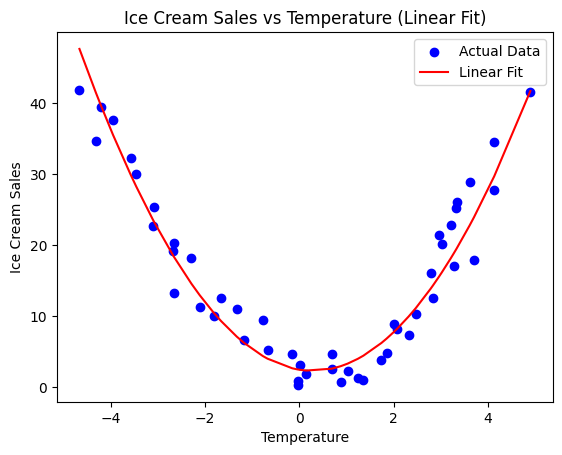

In [70]:
plt.scatter(X, y, color='blue', label='Actual Data') 
plt.plot(X, y_preds_polynomial, color='red', label='Linear Fit') 
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.title('Ice Cream Sales vs Temperature (Linear Fit)')
plt.legend()
plt.show()